# Defi-IA 2022 <a href="https://www.kaggle.com/c/defi-ia-2022/overview"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" style="max-width: 70px; display: inline" alt="Python"/></a>
-------------------------------------------------------------

**Predict the accumulated daily rainfall on ground stations**  
*Quentin Douzery, Alexia Ghozland, Dario Moed*

## <font color = 'royalblue'>1 Imports</font>

### 1.1 Packages

In [1]:
##Packages
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.preprocessing import scale , StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.models import Sequential

from tqdm import tqdm

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

### 1.2 Data

**Quentin**

In [6]:
coords_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Other/stations_coordinates.csv' #Perso

xtrain_obs_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/X_station_train.csv' #Perso
xtest_obs_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/X_station_test.csv' #Perso

bltest_obs_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #Perso
bltrain_for_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Baselines/Baseline_forecast_train.csv' #Perso
bltest_for_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Test/Baselines/Baseline_forecast_test.csv' #Perso

ytrain_path = '/Users/qdouzery/Desktop/Defi-IA_Data/Train/Y_train.csv' #Perso

In [4]:
coords_path = '/home/douzery/Bureau/Defi-IA_Data/Other/stations_coordinates.csv' #INSA
xtrainS_path = '/home/douzery/Bureau/Defi-IA_Data/Train/X_station_train.csv' #INSA
ytrain_path = '/home/douzery/Bureau/Defi-IA_Data/Train/Y_train.csv' #INSA
xtestS_path = '/home/douzery/Bureau/Defi-IA_Data/Test/X_station_test.csv' #INSA
bl_obsT_path = '/home/douzery/Bureau/Defi-IA_Data/Test/Baselines/Baseline_observation_test.csv' #INSA

**Alexia**

In [3]:
##Données
#coords_path = 'C:/Users/Alexia/Desktop/Other/stations_coordinates.csv' #Perso
#coords_fname  = '/kaggle/input/defi-ia-2022-test/Other/Other/stations_coordinates.csv'

#xtrainS_path = 'C:/Users/Alexia/Desktop/Data/Train/X_station_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/X_station_train.csv'

#ytrain_path = 'C:/Users/Alexia/Desktop/Data/Train/Y_train.csv' #Perso
#fname = '/kaggle/input/defi-ia-2022-test/Train/Train/Y_train.csv'

#xtestS_path = 'C:/Users/Alexia/Desktop/Data/Test/X_station_test.csv' #Perso

#bl_obsT_path = 'C:/Users/Alexia/Desktop/Data/Test/Baselines/Baseline_observation_test.csv' #Perso

## <font color = 'royalblue'>2 Get data</font>

### 2.1 Stations coordinates

In [7]:
##Coords
coords = pd.read_csv(coords_path)
display(coords)
print('Missing Data :', coords.isna().sum().sum(), '\n', 'Shape is :', coords.shape)

,number_sta,lat,lon,height_sta
0,86118001,46.477,0.985,120.0
1,86149001,46.917,0.025,60.0
2,56081003,48.050,-3.660,165.0
3,53215001,47.790,-0.710,63.0
4,22135001,48.550,-3.380,148.0
...,...,...,...,...
320,86137003,47.035,0.098,96.0
321,86165005,46.412,0.841,153.0
322,86273001,46.464,1.042,121.0
323,91200002,48.526,1.993,116.0


Missing Data : 0 
 Shape is : (325, 4)


### 2.2 X_train

In [8]:
xtrain_obs = pd.read_csv(xtrain_obs_path,parse_dates=['date'],infer_datetime_format=True)
xtrain_obs['number_sta'] = xtrain_obs['number_sta'].astype('category')  
display(xtrain_obs)
print('Missing Data :', xtrain_obs.isna().sum().sum(), '\n', 'Shape is :', xtrain_obs.shape)

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


Missing Data : 6899007 
 Shape is : (4409474, 9)


### 2.3 Y_train

In [9]:
ytrain = pd.read_csv(ytrain_path, parse_dates=['date'], infer_datetime_format=True)
ytrain['number_sta'] = ytrain['number_sta'].astype('category')
display(ytrain)
print('Missing Data :', ytrain.isna().sum().sum(), '\n', 'Shape is :', ytrain.shape)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


Missing Data : 21640 
 Shape is : (183747, 4)


### 2.4 X_test

In [10]:
xtest_obs = pd.read_csv(xtest_obs_path,infer_datetime_format=True)
display(xtest_obs)
print('Missing Data :', xtest_obs.isna().sum().sum(), '\n', 'Shape is :', xtest_obs.shape)

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


Missing Data : 3914287 
 Shape is : (2304802, 8)


### 2.5 Baseline observations

In [11]:
bltest_obs = pd.read_csv(bltest_obs_path,infer_datetime_format=True)

### 2.6 Baseline forecast

In [12]:
bltrain_for = pd.read_csv(bltrain_for_path, infer_datetime_format=True)
bltest_for = pd.read_csv(bltest_for_path, infer_datetime_format=True)

## <font color = 'royalblue'>3 Pre-processing</font>

### 3.0 Useful functions

In [13]:
def Get_NumberSta(id):
    return int(id.split('_')[0])

In [14]:
def Get_StationDay(id):
    return id.split('_')[0] + "_" + id.split('_')[1]

In [15]:
def Id_to_int(id):
    return int(id.split('_')[0] + id.split('_')[1] + id.split('_')[2])

In [16]:
def Get_Season(month):
    if (month in [1,2,3]):
        season = "Hiver"
    elif (month in [4,5,6]):
        season = "Printemps"
    elif (month in [7,8,9]):
        season = "Ete"
    else:
        season = "Automne"
    
    return season

In [43]:
def Is_LastHour(id):
    ##Get hour of the given Id
    hour = int(id.split('_')[2])
    
    ##Determine if it is the last hour of the day
    if (hour == 23):
        return 1
    else:
        return 0

In [18]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [19]:
def Remove_outliers(xdf, ydf, dct):
    xdf_cp = xdf.copy()
    ydf_cp = ydf.copy()
    
    ##Remove small and large outliers
    for variable, outliers in dct.items():
        xdf_cp = xdf_cp[xdf_cp[variable] >= outliers[0]] #Remove small ones
        xdf_cp = xdf_cp[xdf_cp[variable] <= outliers[1]] #Remove large ones
    
    ##Keep same rows in xtrain and ytrain
    ydf_cp = ydf_cp[ydf_cp.index.isin(xdf_cp.index)]
    
    ##Reset index
    xdf_cp.reset_index(drop=True, inplace=True)
    ydf_cp.reset_index(drop=True, inplace=True)
    
    return xdf_cp, ydf_cp

### 3.1 Train data

In [51]:
def Preprocess_train (xtrain, ytrain, nan, mean, smooth_means, means_on):
    ##Copy original df
    xtrain_p = xtrain.copy()
    ytrain_p = ytrain.copy()
    
    ##Add stations coordinates
    xtrain_p = xtrain_p.merge(coords, how='left', on='number_sta')
    
    ##Add 'month' variable
    xtrain_p['month'] = xtrain_p['date'].dt.month

    ##Handle NaNs
    if (nan == "drop"): #Drop all NaNs
        xtrain_p.dropna(inplace=True)
        ytrain_p.dropna(inplace=True)
    elif (nan == "fill"): #Fill NaNs
        xtrain_p = xtrain_p.fillna(method="backfill")
        ytrain_p = ytrain_p.fillna(method="backfill")
    
    ##Create 'StationDay' variable
    xtrain_p = xtrain_p.assign(StationDay=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"StationDay"] = xtrain_p.loc[:,"Id"].apply(Get_StationDay)
    
    ##Create 'LastHour' variable
    xtrain_p = xtrain_p.assign(LastHour=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,'LastHour'] = xtrain_p.loc[:,'Id'].apply(Is_LastHour)
    
    ##Get last hour observation for ['dd', 'hu', 'td', 't', 'ff']
    xtrain_p['last_dd'] = xtrain_p['LastHour']*xtrain_p['dd']
    xtrain_p['last_hu'] = xtrain_p['LastHour']*xtrain_p['hu']
    xtrain_p['last_td'] = xtrain_p['LastHour']*xtrain_p['td']
    xtrain_p['last_t'] = xtrain_p['LastHour']*xtrain_p['t']
    xtrain_p['last_ff'] = xtrain_p['LastHour']*xtrain_p['ff']
    
    ##Drop useless variables
    xtrain_p.drop(['number_sta', 'date', 'Id', 'LastHour'], axis=1, inplace=True)
    ytrain_p.drop(['date', 'number_sta'], axis=1, inplace=True)
    
    ##Mean on 24 hours for ['dd', 'hu', 'td', 't', 'ff']
    if (mean == "all"): #Mean on all the values of a day
        aux_precip = xtrain_p[['StationDay', 'precip', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']]
        sum_precip = aux_precip.groupby(['StationDay'], as_index=False).sum()
        xtrain_p = xtrain_p.groupby(['StationDay'], as_index=False).mean()
        xtrain_p.loc[:,['precip', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']] = sum_precip.loc[:,['precip', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']]
    elif (mean == "just24"): #Mean just if there are 24 hours in a day
        xtrain_p = xtrain_p.groupby("StationDay", as_index=False).agg(pd.Series.sum, min_count = 24)
        xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                  'lat', 'lon', 'height_sta']] = xtrain_p[['dd', 'hu', 'td', 't', 'ff', 'month',
                                                           'lat', 'lon', 'height_sta']].divide(24)
    
    ##Drop NaNs
    xtrain_p.dropna(inplace=True)
    
    ##Keep the same rows in xtrain and ytrain
    xtrain_p = xtrain_p.loc[xtrain_p['StationDay'].isin(ytrain_p["Id"])]
    ytrain_p = ytrain_p.loc[ytrain_p['Id'].isin(xtrain_p["StationDay"])]
    
    ##Reset index
    xtrain_p.reset_index(drop=True, inplace=True)
    ytrain_p.reset_index(drop=True, inplace=True)
    
    ##Sort xtrain (based on ytrain 'Id')
    xtrain_p = xtrain_p.set_index('StationDay')
    xtrain_p = xtrain_p.reindex(index=ytrain_p['Id'])
    xtrain_p = xtrain_p.reset_index()
    
    ##Add 'season' variable
    xtrain_p = xtrain_p.assign(season=pd.Series(np.zeros(xtrain_p.shape[0])).values)
    xtrain_p.loc[:,"season"] = xtrain_p.loc[:,'month'].apply(Get_Season)
    
    ##Get smooth mean for wanted variable
    for variable in smooth_means:
        for variable_bis in means_on:
            mean_variable_on = "mean_" + variable + "_" + variable_bis
            xtrain_p[mean_variable_on] = calc_smooth_mean(xtrain_p, by=variable, on=variable_bis, m=300)
        
    ##Add 'forecast' variable (based on the baseline forecast)
    xtrain_p = xtrain_p.merge(bltrain_for, how='left', on='Id')
    xtrain_p = xtrain_p.rename(columns = {'Prediction':'forecast'})
    xtrain_p.drop(['number_sta', 'date'], axis=1, inplace=True)
    xtrain_p = xtrain_p.fillna(method="backfill")
        
    return xtrain_p, ytrain_p

### 3.3 Test data

In [56]:
def Preprocess_test (xtest, smooth_means, means_on):
    ##Copy original df
    xtest_p = xtest.copy()
    
    ##Create 'number_sta' variable
    xtest_p = xtest_p.assign(number_sta=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"number_sta"] = xtest_p.loc[:,"Id"].apply(Get_NumberSta)
    
    ##Add stations coordinates
    xtest_p = xtest_p.merge(coords, how='left', on='number_sta')
    
    ##Create 'IntId' variable
    xtest_p = xtest_p.assign(IntId=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"IntId"] = xtest_p.loc[:,"Id"].apply(Id_to_int)
    
    ##Sort xtest (based on 'IntId')
    xtest_p = xtest_p.sort_values('IntId', ignore_index=True)
    
    ##Fill NaNs
    xtest_p = xtest_p.fillna(method="backfill")
    
    ##Create 'StationDay' variable
    xtest_p = xtest_p.assign(StationDay=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"StationDay"] = xtest_p.loc[:,"Id"].apply(Get_StationDay)
    
    ##Create 'LastHour' variable
    xtest_p = xtest_p.assign(LastHour=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,'LastHour'] = xtest_p.loc[:,'Id'].apply(Is_LastHour)
    
    ##Get last hour observation for ['dd', 'hu', 'td', 't', 'ff']
    xtest_p['last_dd'] = xtest_p['LastHour']*xtest_p['dd']
    xtest_p['last_hu'] = xtest_p['LastHour']*xtest_p['hu']
    xtest_p['last_td'] = xtest_p['LastHour']*xtest_p['td']
    xtest_p['last_t'] = xtest_p['LastHour']*xtest_p['t']
    xtest_p['last_ff'] = xtest_p['LastHour']*xtest_p['ff']
    
    ##Drop useless variables
    xtest_p.drop(['Id', 'IntId', 'number_sta', 'LastHour'], axis=1, inplace=True)

    ##Mean on 24 hours for ['dd', 'hu', 'td', 't', 'ff']
    aux_precip = xtest_p[['StationDay', 'precip', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']]
    sum_precip = aux_precip.groupby(['StationDay'], as_index=False).sum()
    xtest_p = xtest_p.groupby(['StationDay'], as_index=False).mean()
    xtest_p.loc[:,['precip', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']] = sum_precip.loc[:,['precip', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']]
    
    ##Drop NaNs
    xtest_p.dropna(inplace=True)
    
    ##Keep the same rows in xtest and ytest
    xtest_p = xtest_p.loc[xtest_p['StationDay'].isin(bltest_obs["Id"])]

    ##Reset index
    xtest_p.reset_index(drop=True, inplace=True)
    
    ##Sort xtest (based on baseline_obs 'Id')
    xtest_p = xtest_p.set_index('StationDay')
    xtest_p = xtest_p.reindex(index=bltest_obs['Id'])
    xtest_p = xtest_p.reset_index()
    
    ##Rearrange columns order (same as in xtrain)
    xtest_p = xtest_p[['Id', 'ff', 't', 'td', 'hu', 'dd', 'precip',
                       'lat', 'lon', 'height_sta', 'month', 'last_dd', 'last_hu', 'last_td', 'last_t', 'last_ff']]
    
    ##Add 'season' variable
    xtest_p = xtest_p.assign(season=pd.Series(np.zeros(xtest_p.shape[0])).values)
    xtest_p.loc[:,"season"] = xtest_p.loc[:,'month'].apply(Get_Season)
    
    ##Get smooth mean for wanted variable
    for variable in smooth_means:
        for variable_bis in means_on:
            mean_variable_on = "mean_" + variable + "_" + variable_bis
            xtest_p[mean_variable_on] = calc_smooth_mean(xtest_p, by=variable, on=variable_bis, m=300)
        
    ##Add 'forecast' variable (based on the baseline forecast)
    xtest_p = xtest_p.merge(bltest_for, how='left', on='Id')
    xtest_p = xtest_p.rename(columns = {'Prediction':'forecast'})
    xtest_p = xtest_p.fillna(method="backfill")
    
    return xtest_p

## <font color = 'royalblue'>4 Models</font>

### 4.0 Useful functions

In [66]:
def Variable_to_CoSin(df, variable):
    df2 = df.copy()
    
    ##Create features names
    norm_var = "norm_" + variable
    cos_var = "cos_" + variable
    sin_var = "sin_" + variable
    
    ##Normalize values to match with the 0-2π cycle
    df2[norm_var] = (2*np.pi*df2[variable])/df2[variable].max()
    
    ##Create cos and sin features
    df2[cos_var] = np.cos(df2[norm_var])
    df2[sin_var] = np.sin(df2[norm_var])
    
    ##Drop normalized variable
    df2.drop([variable, norm_var], axis=1, inplace=True)
    
    return df2

In [67]:
def Normalization(x_train, x_test):
    #Copy of the original df
    x_train_c = x_train.copy()
    x_test_c = x_test.copy()
    
    #Calcul de la moyenne et de la variance de l'échantillon train
    mean = x_train_c.mean()
    std  = x_train_c.std()
    
    #Normalisation
    x_train_c = (x_train_c - mean) / std
    x_test_c  = (x_test_c  - mean) / std

    return x_train_c, x_test_c

### 4.1 Classifiers

In [68]:
def Classifier_0(shape, n_layers, n_neurons):
    ##Initialiser modèle
    classifier = keras.models.Sequential(name='Classifier_0')
    
    ##Input layer
    classifier.add(keras.layers.Input(shape))
    
    ##Hidden layers
    for i in range(n_layers):
        classifier.add(keras.layers.Dense(n_neurons, kernel_initializer='uniform', activation='relu'))
        
    ##Output layer
    classifier.add(keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid', name='Output'))
    
    ##Compile model
    classifier.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])
    
    return classifier

### 4.2 Regressors

In [69]:
def Regressor_1(shape, n_layers, n_neurons): 
    ##Initialize model
    regressor = keras.models.Sequential(name='Regressor_1')
   
    ##Input layer
    regressor.add(keras.layers.Input(shape))
    
    ##Hidden layers
    for i in range(n_layers): 
        regressor.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    ##Output layer
    regressor.add(keras.layers.Dense(1, name='Output'))
    
    ##Compile model
    regressor.compile(optimizer = 'adam',
                      loss      = 'mae',
                      metrics = ['accuracy'])
    
    return regressor

### 4.3 Multi models

In [70]:
def Classifier_Regressor(xtrain, ytrain, xtest, ytest,
                         n_layers_c, n_neurons_c, n_layers_r, n_neurons_r,
                         epochs_c, batch_size_c, epochs_r, batch_size_r,
                         to_drop, verbose):
    
    ##Copy original df
    xtrain_cp = xtrain.copy()
    ytrain_cp = ytrain.copy()
    xtest_cp = xtest.copy()
    ytest_cp = ytest.copy()
    
    ##Drop useless variables
    xtrain_cp.drop(['Id'], axis=1, inplace=True)
    xtest_cp.drop(['Id'], axis=1, inplace=True)
    ytrain_cp.drop(['Id'], axis=1, inplace=True)
    
    ##Create ytrain for classif
    ytrain_c = ytrain_cp.copy()
    ytrain_c['Ground_truth'][ytrain_c['Ground_truth'] != 0] = 1
    
    ##Create ytrain for regression
    ytrain_r = ytrain_cp.copy()
    ytrain_r = ytrain_r[ytrain_r['Ground_truth'] > 0]
    
    ##Get 'CoSin month' variable
    xtrain_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtrain_cp['month']), "month")
    xtest_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtest_cp['month']), "month")
    
    ##Drop not wanted variable
    xtrain_cp.drop(to_drop, axis=1, inplace=True)
    xtest_cp.drop(to_drop, axis=1, inplace=True)
    
    ##Normalization
    xtrain_N, xtest_N = Normalization(xtrain_cp, xtest_cp)
    
    ##Add 'CoSin month' variable
    xtrain_N = pd.concat([xtrain_N, xtrain_CoSinMonth], axis=1)
    xtest_N = pd.concat([xtest_N, xtest_CoSinMonth], axis=1)
    
    ##Train Classifier
    n_variables_c = xtrain_N.shape[1]
    classifier = Classifier_0(n_variables_c, n_layers_c, n_neurons_c)
    history_c = classifier.fit(xtrain_N, ytrain_c, batch_size_c, epochs_c, verbose=verbose)
    
    ##Create xtrain for regression
    xtrain_N_r = xtrain_N[xtrain_N.index.isin(ytrain_r.index)]
    xtrain_N_r.reset_index(drop=True, inplace=True)
    ytrain_r.reset_index(drop=True, inplace=True)
    
    ##Train regressor
    n_variables_r = xtrain_N_r.shape[1]
    regressor = Regressor_1(n_variables_r, n_layers_r, n_neurons_r)
    history_r = regressor.fit(xtrain_N_r, ytrain_r, batch_size_r, epochs_r, verbose=verbose)
    
    ##Predict 'rain or not'
    ypred_c = classifier.predict(xtest_N)
    ypred_c = (ypred_c > 0.5).astype(int)
    ypred_c = pd.DataFrame(ypred_c, columns=['Rain'])
    
    norain = ypred_c[ypred_c['Rain'] == 0]
    rain = ypred_c[ypred_c['Rain'] == 1]
    
    ##Set 'no rain' predictions
    ypred = ytest_cp.copy()
    ypred = ypred.rename(columns = {'Ground_truth' : 'Prediction'})
    ypred.loc[ypred.index.isin(norain.index), 'Prediction'] = 0
    
    ##Preprocessing for regressor predictions
    xtest_N_r = xtest_N[xtest_N.index.isin(rain.index)]
    
    ##Regressor predictions
    ypred_r = regressor.predict(xtest_N_r)
    ypred_r = ypred_r.flatten()
    
    ##Set 'rain' predictions
    ypred.loc[ypred.index.isin(rain.index), 'Prediction'] = ypred_r
    
    ##Round predictions to nearest 10th
    ypred['Prediction'] = ypred['Prediction'].round(1)
    
    return ypred

In [71]:
def Regressor(xtrain, ytrain, xtest, ytest,
              n_layers_r, n_neurons_r,
              epochs_r, batch_size_r,
              to_drop, verbose,
              dict_outliers):
    
    ##Copy original df
    xtrain_cp = xtrain.copy()
    ytrain_cp = ytrain.copy()
    xtest_cp = xtest.copy()
    ytest_cp = ytest.copy()
    
    ##Remove outliers
    xtrain_cp, ytrain_cp = Remove_outliers(xtrain_cp, ytrain_cp, dict_outliers)
    
    ##Drop useless variables
    xtrain_cp.drop(['Id'], axis=1, inplace=True)
    xtest_cp.drop(['Id'], axis=1, inplace=True)
    ytrain_cp.drop(['Id'], axis=1, inplace=True)
    
    ##Get 'CoSin month'
    xtrain_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtrain_cp['month']), "month")
    xtest_CoSinMonth = Variable_to_CoSin(pd.DataFrame(xtest_cp['month']), "month")
    
    ##Drop not wanted variable
    xtrain_cp.drop(to_drop, axis=1, inplace=True)
    xtest_cp.drop(to_drop, axis=1, inplace=True)

    ##Normalization
    xtrain_N, xtest_N = Normalization(xtrain_cp, xtest_cp)
    
    ##Add 'CoSin month'
    xtrain_N = pd.concat([xtrain_N, xtrain_CoSinMonth], axis=1)
    xtest_N = pd.concat([xtest_N, xtest_CoSinMonth], axis=1)
    
    ##Train regressor
    n_variables_r = xtrain_N.shape[1]
    regressor = Regressor_1(n_variables_r, n_layers_r, n_neurons_r)
    history_r = regressor.fit(xtrain_N, ytrain_cp, batch_size_r, epochs_r, verbose=verbose)

    ##Regressor predictions
    ypred = ytest_cp.copy()
    ypred = ypred.rename(columns = {'Ground_truth' : 'Prediction'})
    ypred_r = regressor.predict(xtest_N)
    ypred.loc[:,'Prediction'] = ypred_r
    
    ##Round predictions to nearest 10th
    ypred['Prediction'] = ypred['Prediction'].round(1)
    
    return ypred

## <font color = 'royalblue'>5 Validation</font>

In [72]:
xtrain_p, ytrain_p = Preprocess_train(xtrain_obs, ytrain, "fill", "all",
                                      ['season', 'month'], ['precip'])

In [73]:
xtest_p = Preprocess_test(xtest_obs, ['season', 'month'], ['precip'])

### 5.1 Metrics

In [74]:
def Metric(metric, ypred, ytrue):
    if (metric == "MAPE"):
        aux = abs((ytrue-ypred)/ytrue)
        return 100*aux.mean(axis=0)
    elif (metric == "ACCURACY"):
        aux = abs(ytrue-ypred)
        return 100*(1-aux.mean(axis=0))

### 5.2 Sampling

In [75]:
def Create_samples (xtrain, ytrain):
    ##Copy original df
    xtrain_c = xtrain.copy()
    ytrain_c = ytrain.copy()
    
    #Split X validation/train
    xtrain_v = xtrain_c.sample(frac=0.20, axis=0)
    xtrain_t = xtrain_c.drop(xtrain_v.index)
    
    ##Split Y validation/train
    ytrain_v = ytrain_c.loc[ytrain_c['Id'].isin(xtrain_v['Id'])]
    ytrain_t = ytrain_c.drop(ytrain_v.index)
    
    ##Reset index
    xtrain_t.reset_index(drop=True, inplace=True)
    xtrain_v.reset_index(drop=True, inplace=True)
    ytrain_t.reset_index(drop=True, inplace=True)
    ytrain_v.reset_index(drop=True, inplace=True)
    
    ##Sort X
    xtrain_t = xtrain_t.set_index('Id')
    xtrain_t = xtrain_t.reindex(index=ytrain_t['Id'])
    xtrain_t = xtrain_t.reset_index()
    
    xtrain_v = xtrain_v.set_index('Id')
    xtrain_v = xtrain_v.reindex(index=ytrain_v['Id'])
    xtrain_v = xtrain_v.reset_index()
    
    return xtrain_t, xtrain_v, ytrain_t, ytrain_v

### 5.3 K-fold validation

In [29]:
def Validation(model,
               K, metric,
               to_drop, verbose,
               xtrain, ytrain,
               n_layers_c, n_neurons_c, n_layers_r, n_neurons_r,
               epochs_c, batch_size_c, epochs_r, batch_size_r,):
    
    ts = time.time()
    METRIC = np.zeros(K)
    
    for k in range(K):
        xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrain, ytrain)
        
        if (model == "Regressor"):
            ypred = Regressor(xtrain_t, ytrain_t, xtrain_v, ytrain_v,
                              n_layers_r, n_neurons_r,
                              epochs_r, batch_size_r,
                              to_drop, verbose)
            
        elif (model == "Classifier_Regressor"):
            ypred = Classifier_Regressor(xtrain_t, ytrain_t, xtrain_v, ytrain_v,
                                         n_layers_c, n_neurons_c, n_layers_r, n_neurons_r,
                                         epochs_c, batch_size_c, epochs_r, batch_size_r,
                                         to_drop, verbose)
        
        elif (model == "Classifier"):
            pass
        
        ##Post-processing
        ypred.loc[:,'Prediction'] = ypred.loc[:,'Prediction'] + 1
        ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1

        ##Compute METRIC
        METRIC[k] = Metric(metric, ypred['Prediction'], ytrain_v['Ground_truth'])
    
    te = time.time()
    execution_time = te-ts
    return METRIC, execution_time

In [111]:
##Model parameters
n_layers_c = 10
n_neurons_c = 64
n_layers_r = 20
n_neurons_r = 32
to_drop = ['month', 'season', 'ff', 't', 'td', 'hu', 'dd']
#dict_outliers = {'precip':[0,10], 'dd':[0,400], 'hu':[15,100], 'td':[260,300], 't':[260,310], 'ff':[0,15]}
dict_outliers = {}

##Training parameters
verbose = 0
epochs_c = 20
batch_size_c = 100
epochs_r = 20
batch_size_r = 250

##Validation parameters
K = 20
metric = "MAPE"

##Validation process
METRIC = np.zeros(K)

In [112]:
for k in tqdm(range(K)):
    ##Create samples
    xtrain_t, xtrain_v, ytrain_t, ytrain_v = Create_samples(xtrain_p, ytrain_p)
    
    ##Train and predict with the model
    ypred = Regressor(xtrain_t, ytrain_t, xtrain_v, ytrain_v,
                      n_layers_r, n_neurons_r,
                      epochs_r, batch_size_r,
                      to_drop, verbose,
                      dict_outliers)
    
#    ypred = Classifier_Regressor(xtrain_t, ytrain_t, xtrain_v, ytrain_v,
#                                 n_layers_c, n_neurons_c, n_layers_r, n_neurons_r,
#                                 epochs_c, batch_size_c, epochs_r, batch_size_r,
#                                 to_drop, verbose)

    ##Post-processing
    ypred.loc[:,'Prediction'] = ypred.loc[:,'Prediction'] + 1
    ytrain_v.loc[:,'Ground_truth'] = ytrain_v.loc[:,'Ground_truth'] + 1

    ##Compute METRIC
    METRIC[k] = Metric(metric, ypred['Prediction'], ytrain_v['Ground_truth'])

100%|██████████| 20/20 [12:11<00:00, 36.58s/it]


Mean MAPE : 30.301157487020554


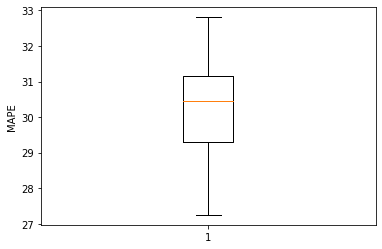

In [97]:
##Plot the metric boxplot
print("Mean", metric, ":", np.mean(METRIC))
plt.boxplot(METRIC)
plt.ylabel(metric)
plt.show()

Drop + just24 : [28, 33] 30 (32, 33.8)  
Drop + all : [28, 35] 30 ()  
Fill + all : [27, 35] 31 (31.5, 33)  

Fill + all (smooth means for all variables) : [29, 34] 31  
Fill + all (smooth means for all variables + round to 10th) : [29, 33] 30 (33, 41)

LastHour (outliers not removed, mean just on precip) : [26, 33] 30 (33, 38.5)

**Important** : La MAPE de validation ne dépend pas particulièrement du split train/validation, mais juste de la robustesse du réseau de neurones.

## <font color = 'royalblue'>6 Training & prediction</font>

In [105]:
##Model parameters
n_layers_r = 20
n_neurons_r = 32
to_drop = ['month', 'season']
#dict_outliers = {'precip':[0,10], 'dd':[0,400], 'hu':[15,100], 'td':[260,300], 't':[260,310], 'ff':[0,15]}
dict_outliers = {}

##Training parameters
verbose = 1
epochs_r = 20
batch_size_r = 200

In [106]:
Regressor_predictions = Regressor(xtrain_p, ytrain_p, xtest_p, bltest_obs,
                                  n_layers_r, n_neurons_r,
                                  epochs_r, batch_size_r,
                                  to_drop, verbose,
                                  dict_outliers)

Epoch 1/20
919/919 [==============================] - 5s 3ms/step - loss: 1.4579 - accuracy: 0.3961
Epoch 2/20
919/919 [==============================] - 4s 4ms/step - loss: 1.2200 - accuracy: 0.3986
Epoch 3/20
919/919 [==============================] - 3s 4ms/step - loss: 1.1963 - accuracy: 0.3973
Epoch 4/20
919/919 [==============================] - 3s 3ms/step - loss: 1.2012 - accuracy: 0.3961
Epoch 5/20
919/919 [==============================] - 3s 3ms/step - loss: 1.1930 - accuracy: 0.3948
Epoch 6/20
919/919 [==============================] - 3s 3ms/step - loss: 1.1818 - accuracy: 0.3960
Epoch 7/20
919/919 [==============================] - 3s 3ms/step - loss: 1.1746 - accuracy: 0.3949
Epoch 8/20
919/919 [==============================] - 3s 3ms/step - loss: 1.1682 - accuracy: 0.3958
Epoch 9/20
919/919 [==============================] - 3s 3ms/step - loss: 1.1649 - accuracy: 0.3949
Epoch 10/20
919/919 [==============================] - 3s 3ms/step - loss: 1.1497 - accuracy: 0.3966

In [107]:
display(Regressor_predictions)

,Id,Prediction
0,14066001_149,0.2
1,14126001_149,0.0
2,14137001_149,0.2
3,14216001_149,0.0
4,14296001_149,0.0
...,...,...
85135,86137003_293,0.2
85136,86165005_293,0.3
85137,86273001_293,0.7
85138,91200002_293,0.2


## <font color = 'royalblue'>7 Post-processing</font>

In [108]:
Regressor_predictions['Prediction'] = Regressor_predictions['Prediction'] + 1
display(Regressor_predictions)
print('Missing Data :', Regressor_predictions.isna().sum().sum(), '\n', 'Shape is :', Regressor_predictions.shape)

,Id,Prediction
0,14066001_149,1.2
1,14126001_149,1.0
2,14137001_149,1.2
3,14216001_149,1.0
4,14296001_149,1.0
...,...,...
85135,86137003_293,1.2
85136,86165005_293,1.3
85137,86273001_293,1.7
85138,91200002_293,1.2


Missing Data : 0 
 Shape is : (85140, 2)


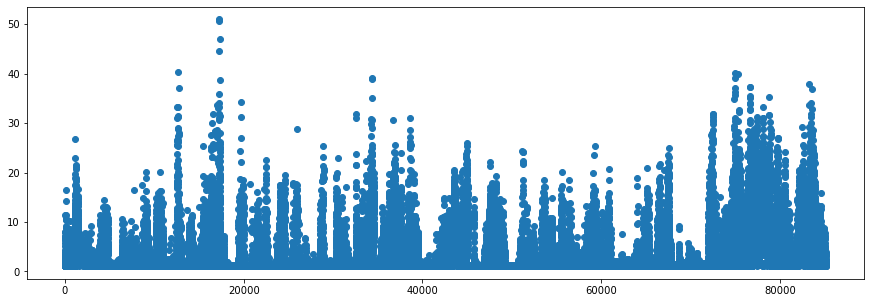

In [109]:
x = np.arange(0, 85140)
plt.figure(figsize=(15,5))
plt.scatter(x, Regressor_predictions['Prediction'])
plt.show()

## <font color = 'royalblue'>8 Exportation</font>

In [110]:
output_file = "Submissions_34_regressor-last-hour-bis.csv"
Regressor_predictions.to_csv('/Users/qdouzery/Desktop/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)
#ClassifReg_predictions.to_csv('/home/douzery/Bureau/Defi-IA-2022_DGM/Submissions/' + output_file, index=False)

#output_file = "Submissions_13_ann-20x32-month-mae.csv"
#Network_predictions.to_csv('C:/Users/Alexia/Desktop/5A/Defi-IA-2022_DGM/Submissions' + output_file, index=False)